# Required Packages:

- pip install clasp_segmentation

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from clasp.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes
from clasp.annotation.plotting.utils import (
    plot_time_series_with_change_points,
)

# Loading the Data

In [2]:
def load_data():
    np_cols = ["x-acc", "y-acc", "z-acc", "x-gyro", "y-gyro", 
               "z-gyro", "x-mag", "y-mag", "z-mag", 
               "lat", "lon", "speed"]
    converters = {col : lambda val: np.array([]) if len(val) == 0 else np.array(eval(val)) for col in np_cols}
    return pd.read_csv("../datasets/har_challenge_no_labels.csv.zip", 
                       converters=converters, compression="zip")

df = load_data()

# Segmentation

We will only use one channel and a subset of the data

Used Channel: y-acc


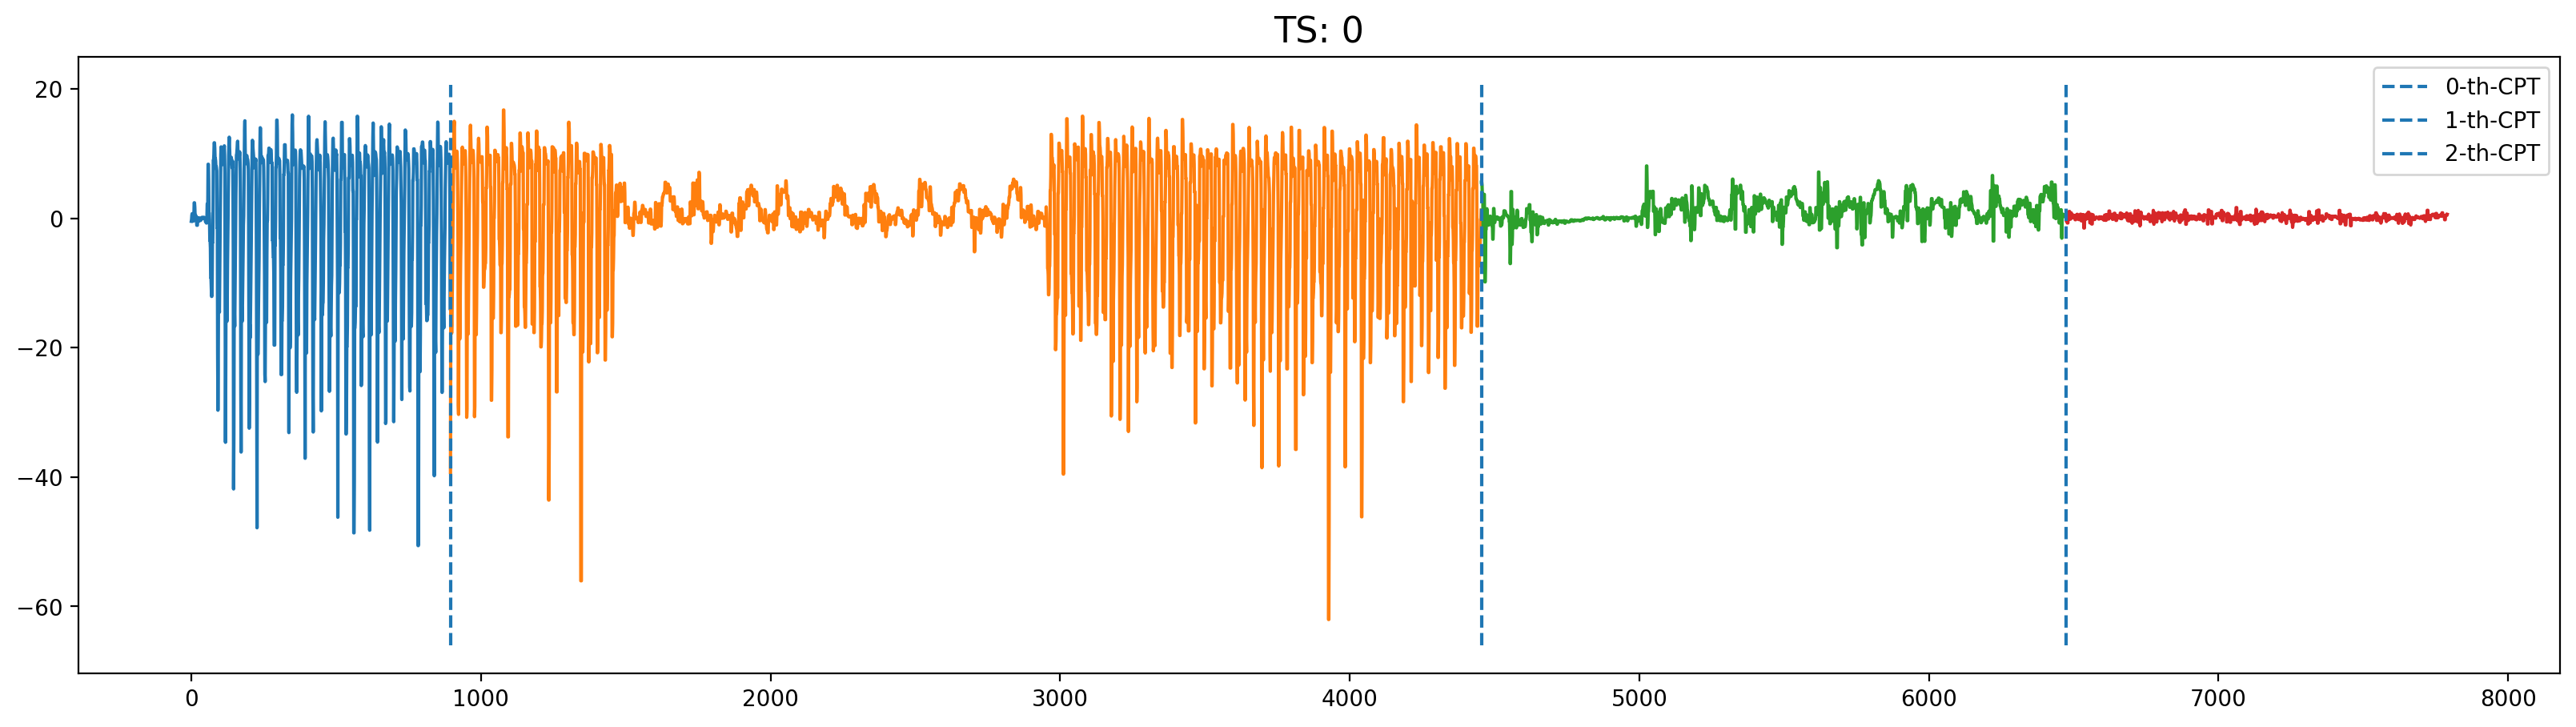

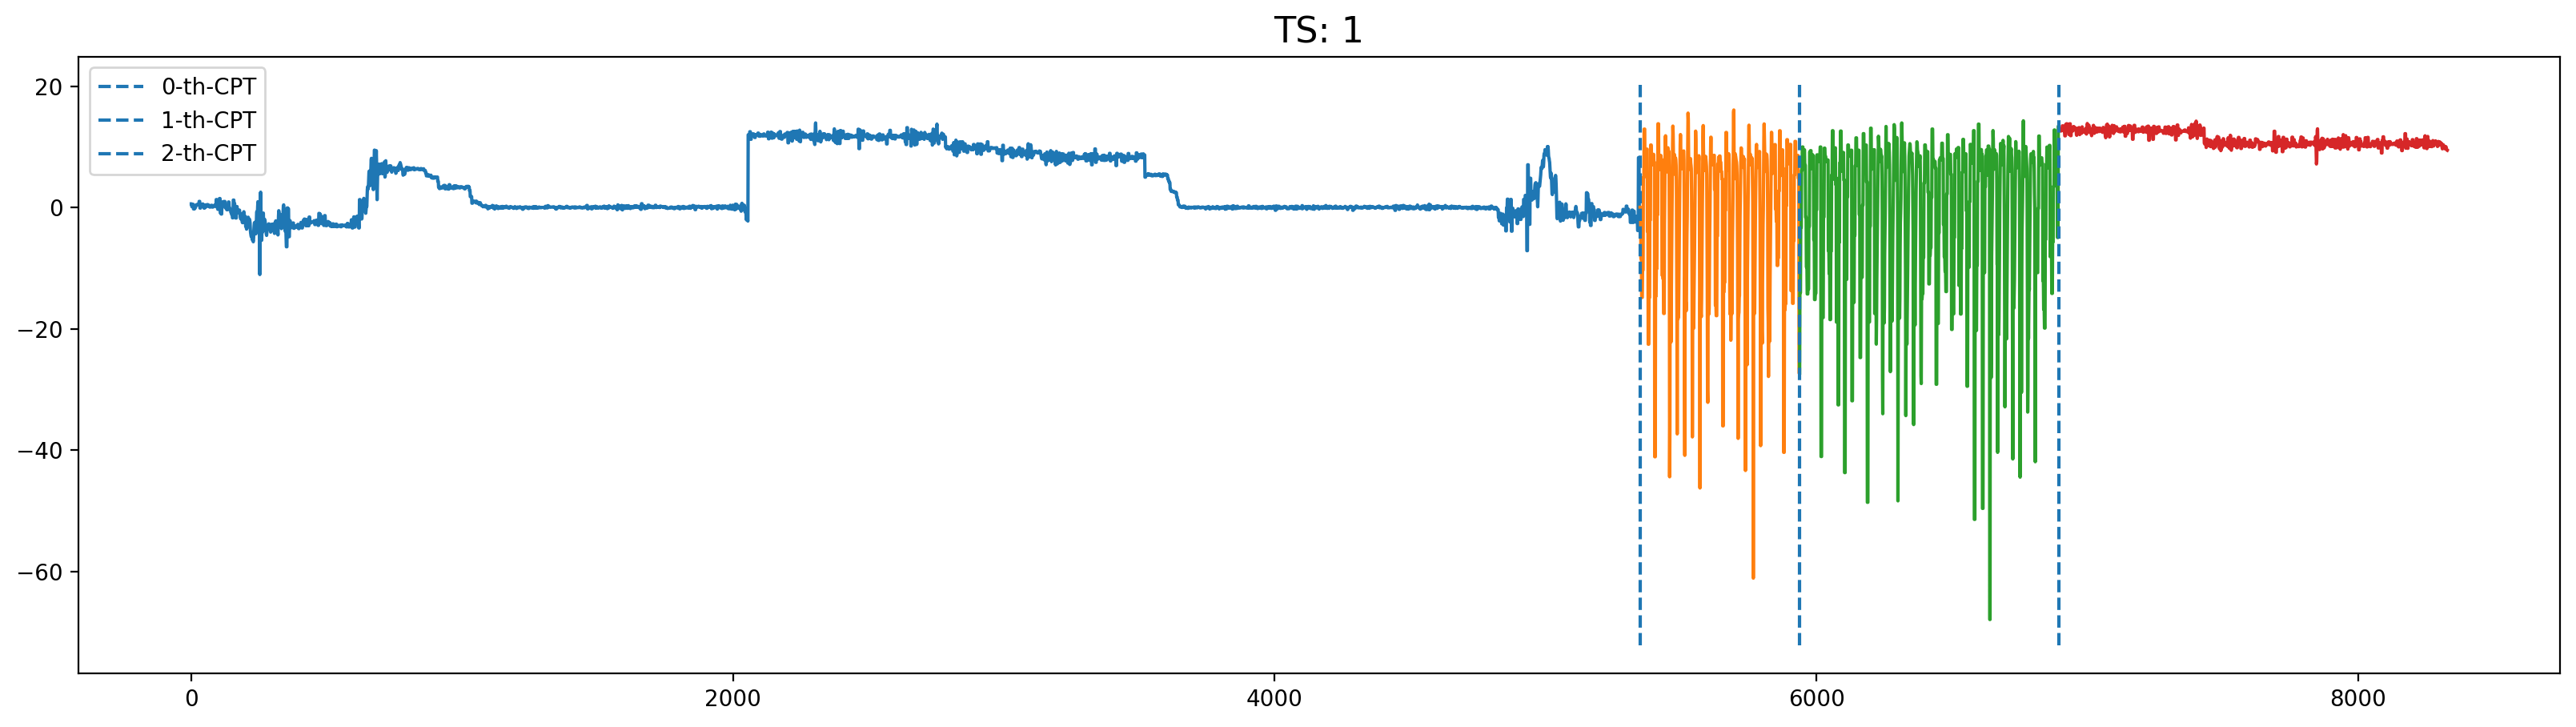

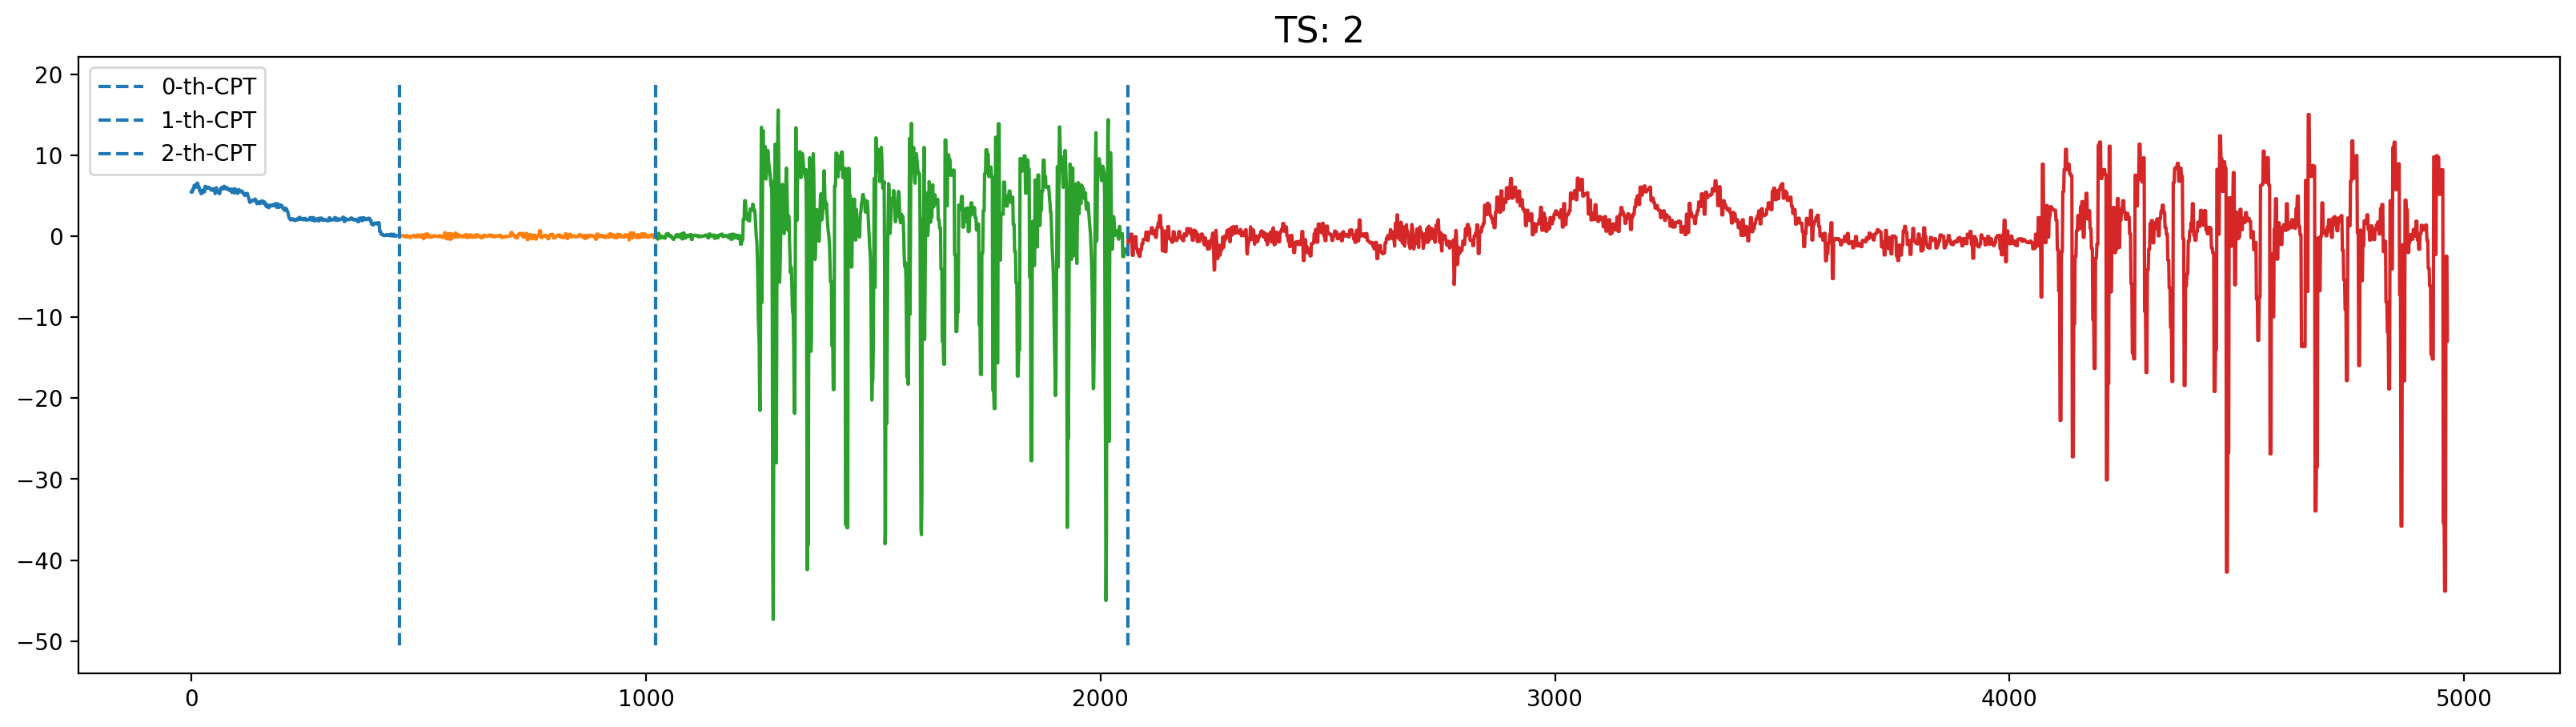

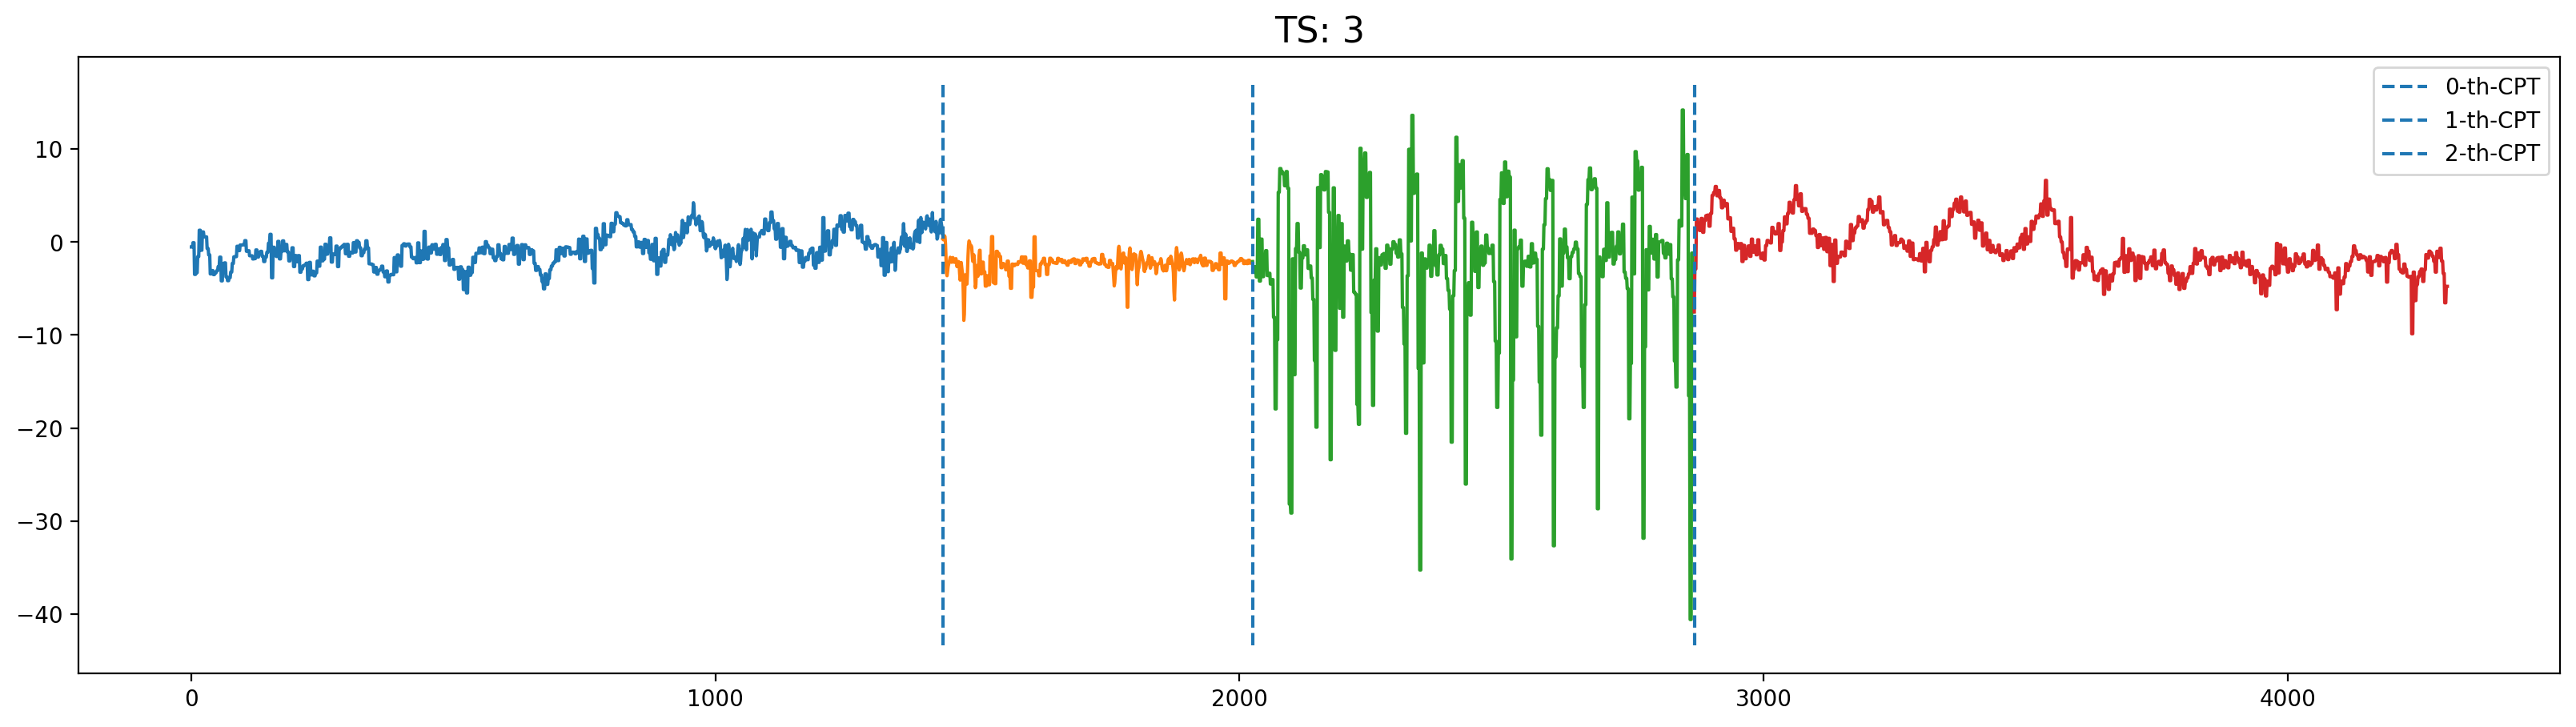

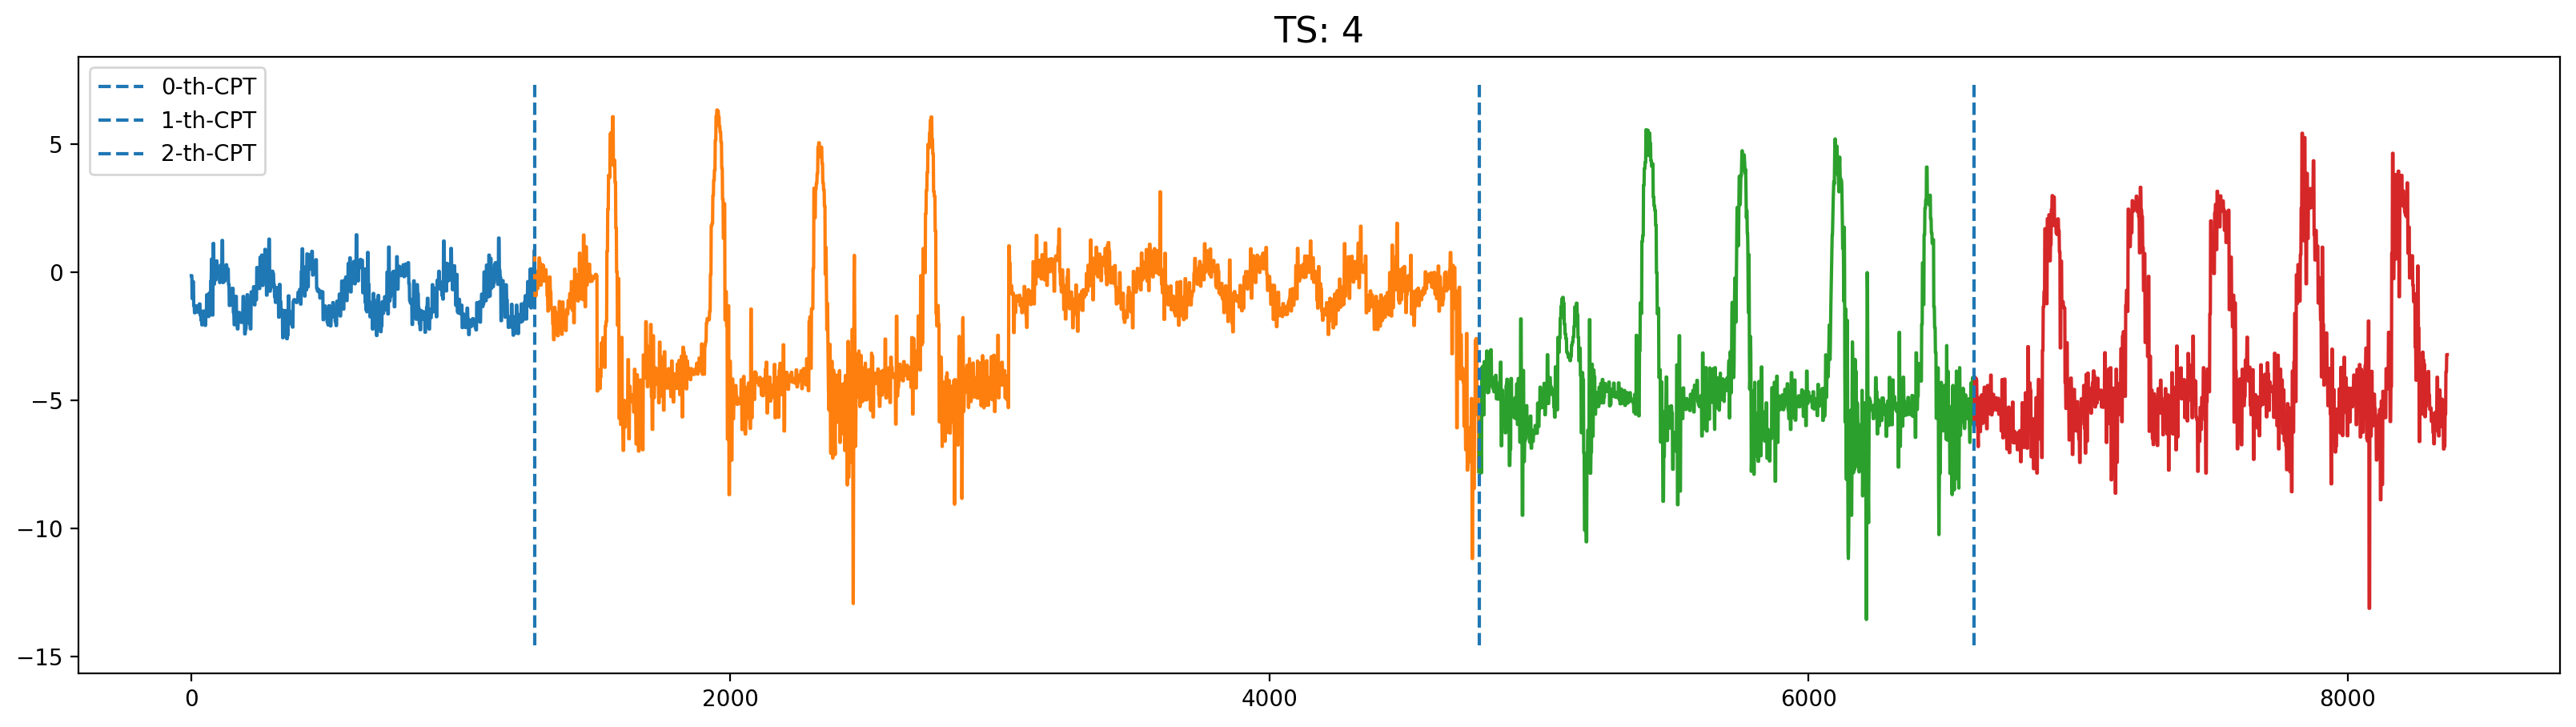

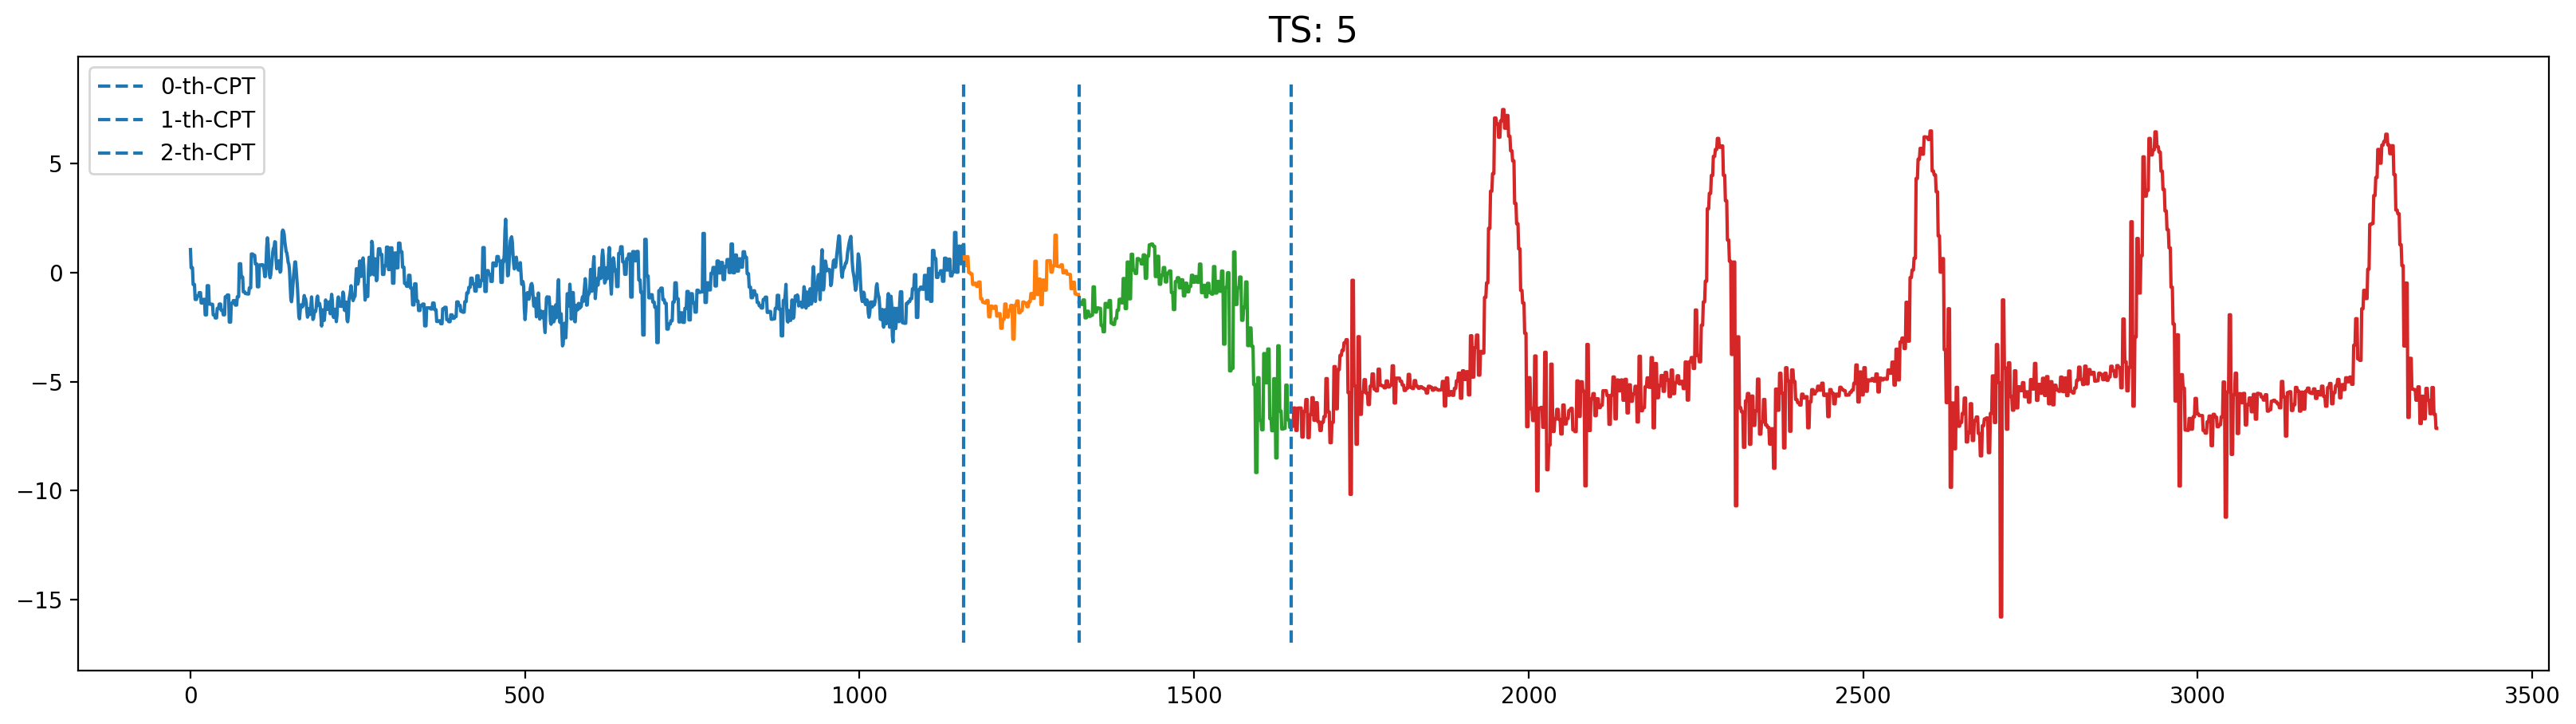

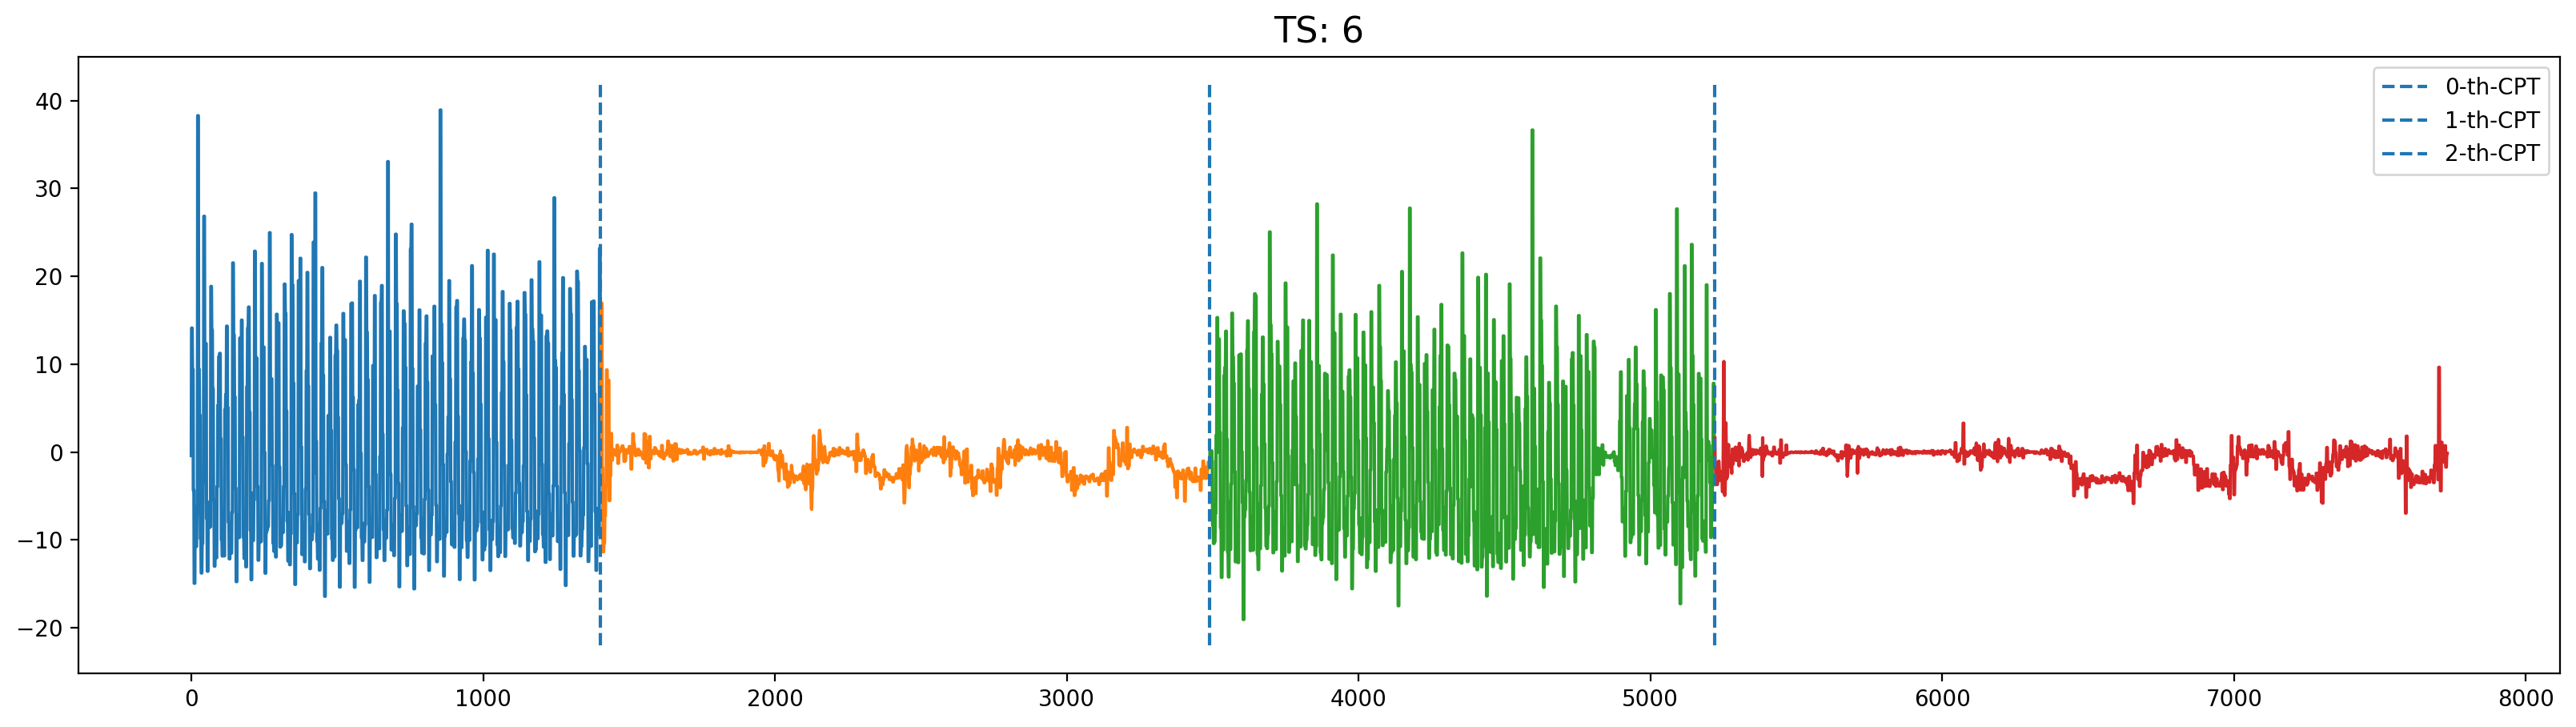

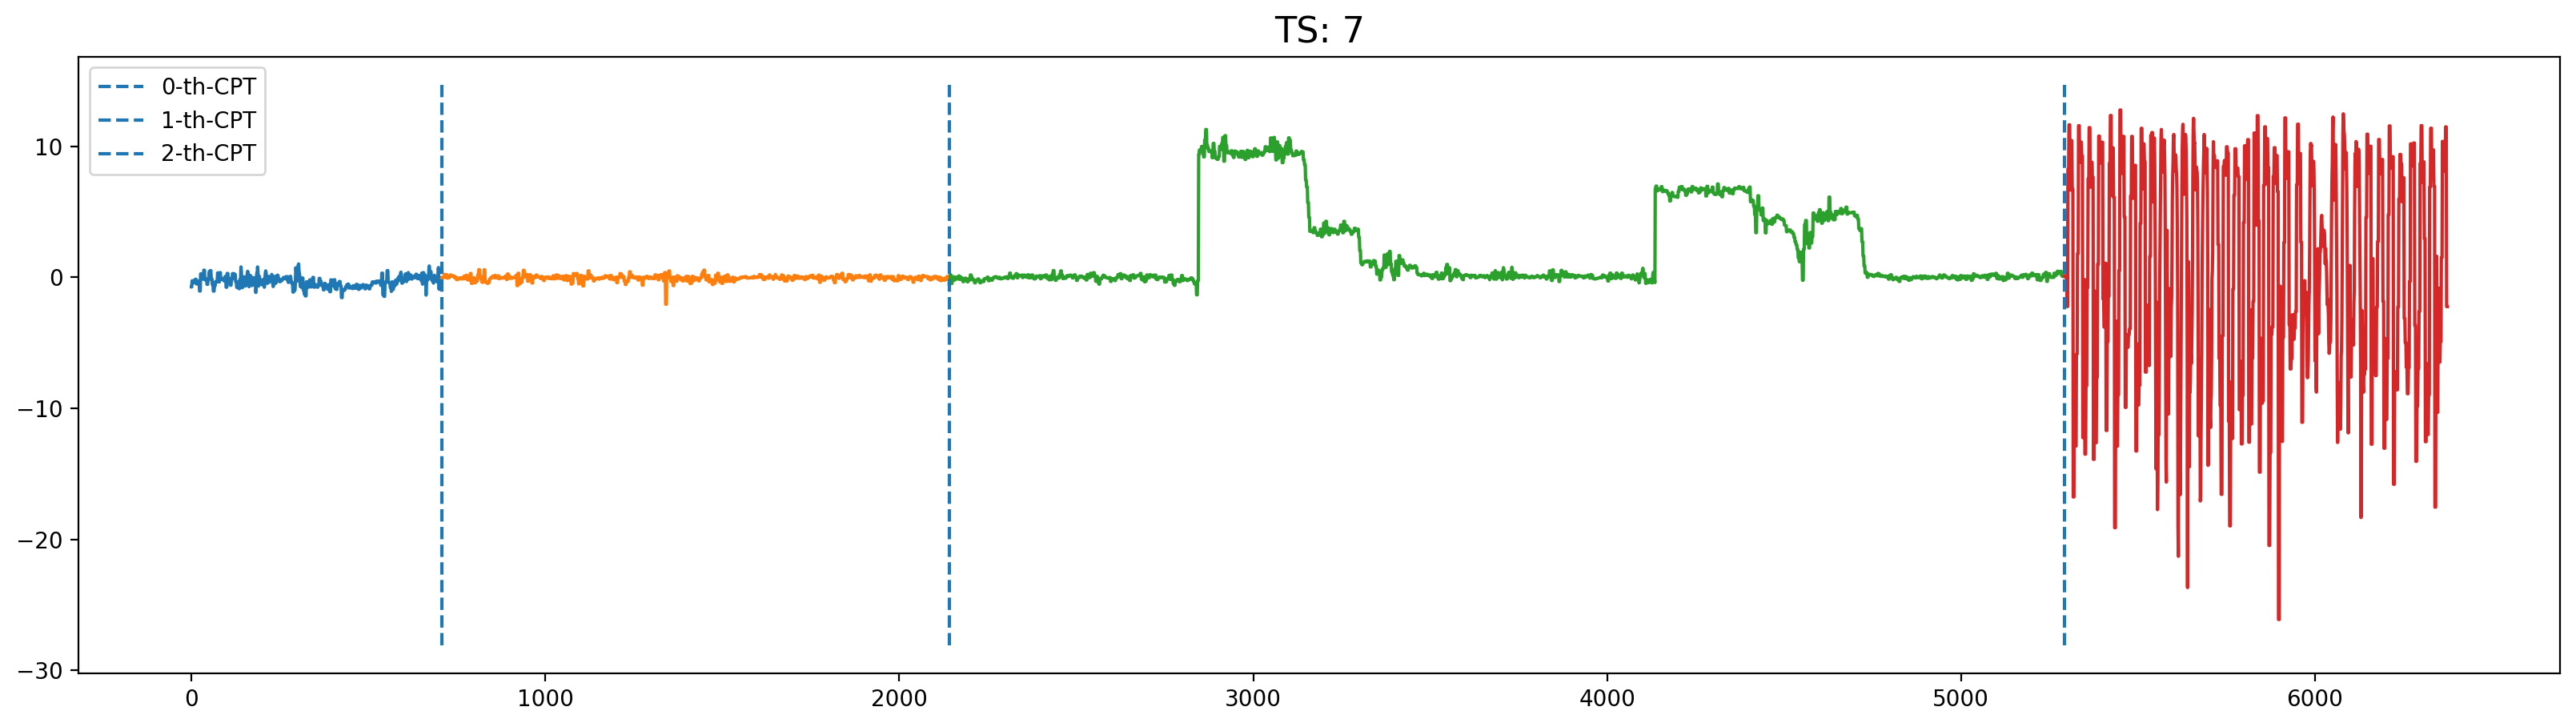

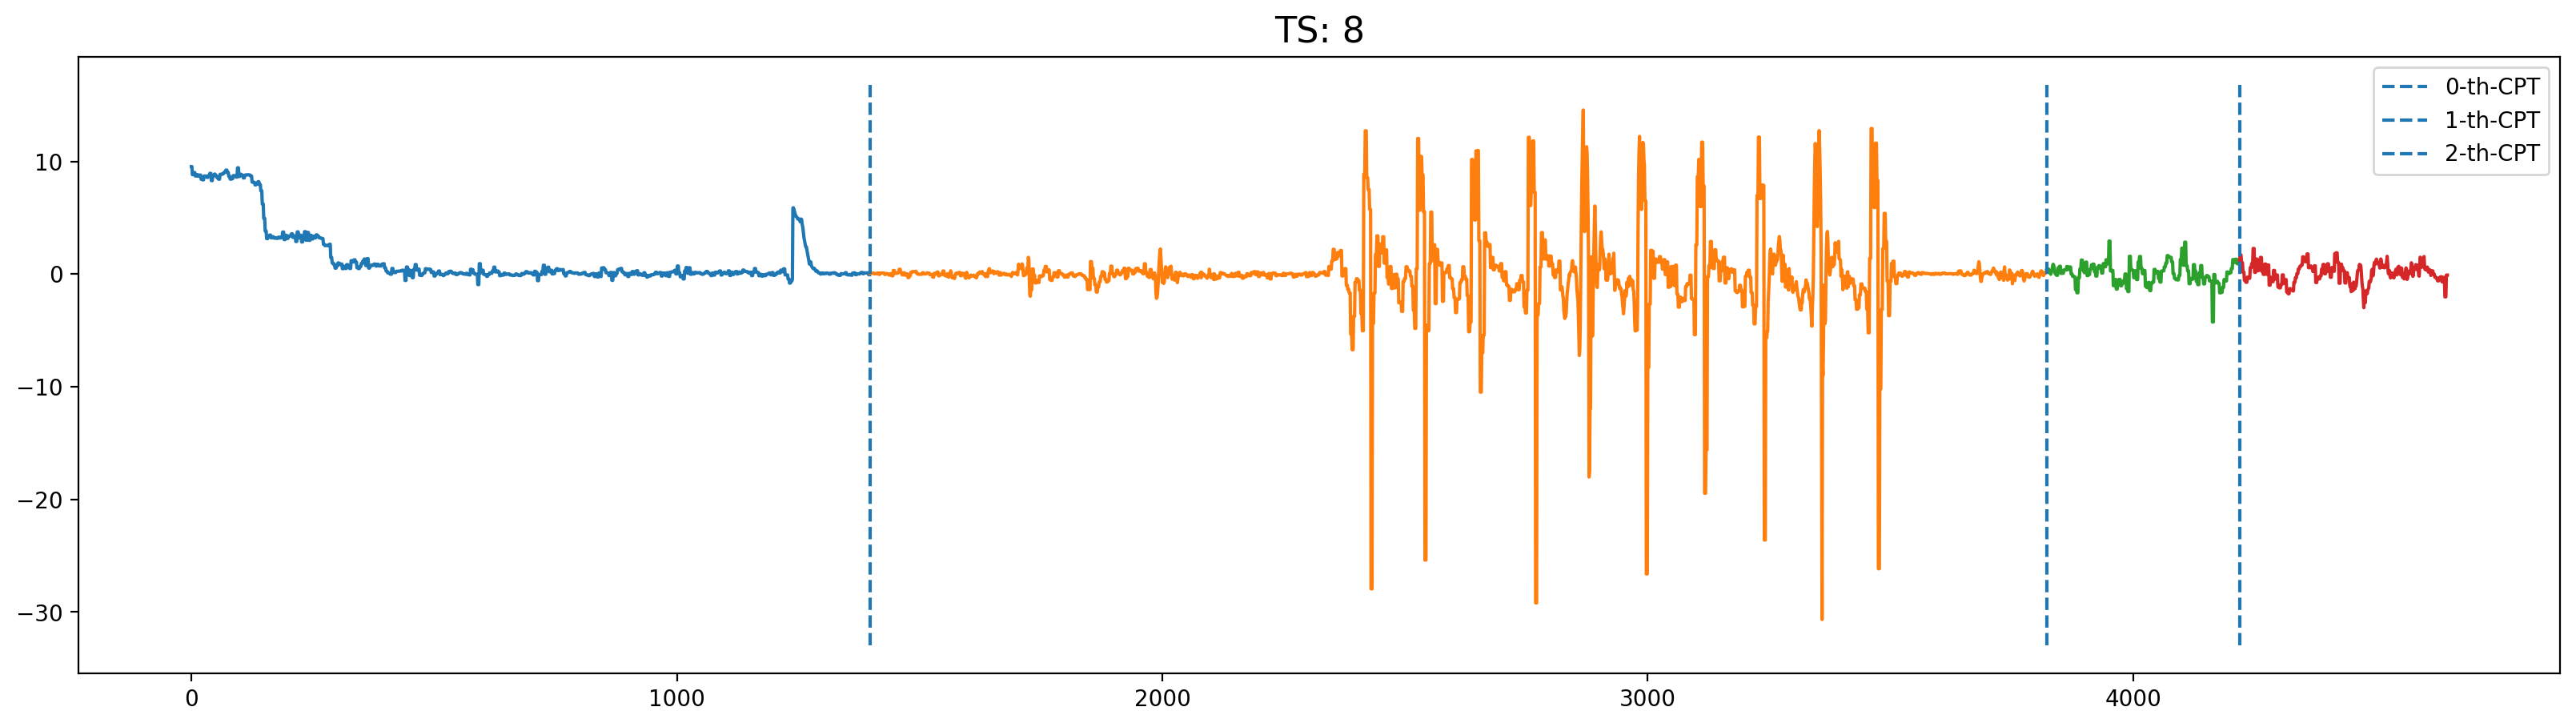

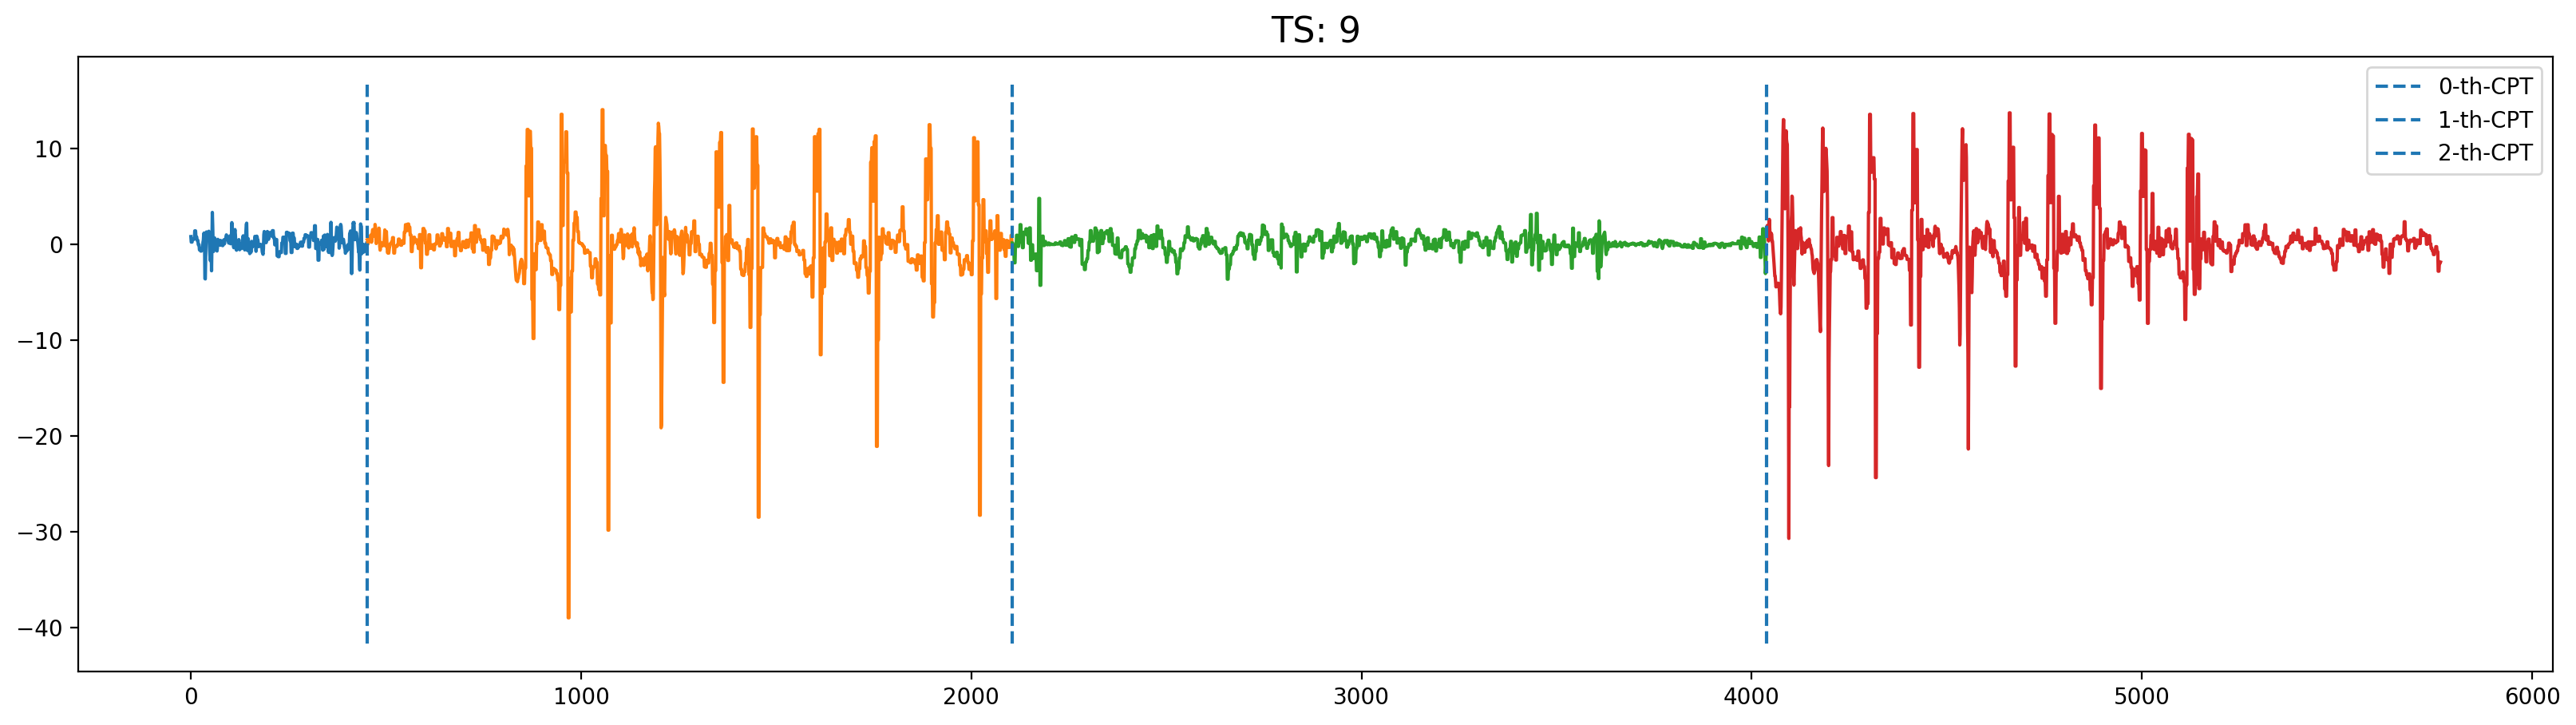

In [3]:
def score(i, ts):  
    if ts is not None and len(ts) > 0:
        m = find_dominant_window_sizes(ts) *  2

        clasp = ClaSPSegmentation(
            period_length=m, 
            n_cps=3, 
            fmt="sparse")

        found_cps = clasp.fit_predict(ts)
        profiles = clasp.profiles
        scores = clasp.scores
        
        fig, ax = plot_time_series_with_change_points("TS: " + str(i), pd.Series(ts), found_cps)
        plt.show()


# use only one channel
channels = ["y-acc"]
# channels = ["x-acc", "y-acc", "z-acc", "x-gyro", "y-gyro", "z-gyro"]

for channel in channels:
    print ("Used Channel:", channel)
    
    # using a subset of the data
    dataset = df[[channel]].iloc[0:10]
    
    for i in range(dataset.shape[0]):
        score(i, dataset.iloc[i][channel])